In [1]:
# using tensorflow_gpuenv

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import re

hello=tf.constant('Hello,TensorFlow!')

sess=tf.Session()

print(sess.run(hello))


b'Hello,TensorFlow!'


get some data

In [2]:
all_words = {}

def clean_word(string):
    wordlist = re.findall(r"[a-z]+", string.lower())
    word = ""
    if len(wordlist) == 0:
        word = "#NUM"
    else:
        word = wordlist[0]
    return word
    

def get_word_counts(data, all_words):
    for i in range(len(data)):
        currentword = str(data.iloc[i,0])
        word = clean_word(currentword)
        if word in all_words:
            all_words[word] += data.iloc[i,2]
        else:
            all_words[word] = data.iloc[i,2]

In [3]:
for i in range(10):
    filename = "googlebooks-eng-1M-1gram-20090715-" + str(i) + ".csv"
    data = pd.read_csv(filename, 
                       sep = '\t', 
                       header = None, 
                       names = ["word","year","total","pages","books"],
                       quotechar=None, 
                       quoting=3,
                       encoding = "ISO-8859-1")
    print(data.head())
    get_word_counts(data, all_words)

  word  year  total  pages  books
0    #  1574      1      1      1
1    #  1584      6      6      1
2    #  1614      1      1      1
3    #  1631    115    100      1
4    #  1632      3      3      1
  word  year  total  pages  books
0    $  1520      1      1      1
1    $  1575     12     12      2
2    $  1576      1      1      1
3    $  1581      1      1      1
4    $  1584     41     38      1
     word  year  total  pages  books
0  $0.007  1905      1      1      1
1  $0.007  1910      2      2      2
2  $0.007  1911      3      3      3
3  $0.007  1912      6      6      6
4  $0.007  1913      4      4      4
    word  year  total  pages  books
0  $0.00  1751      1      1      1
1  $0.00  1782      1      1      1
2  $0.00  1834      1      1      1
3  $0.00  1848      2      2      2
4  $0.00  1849      1      1      1
     word  year  total  pages  books
0  $0.002  1906      1      1      1
1  $0.002  1908      2      2      2
2  $0.002  1909      5      5      5
3  $0.

In [4]:
keys = random.sample(list(all_words), 1000)
print(keys)

['prolecanites', 'ensalza', 'villorum', 'cdntico', 'lats', 'preponderating', 'pitent', 'haloing', 'greeloy', 'inverarity', 'freny', 'kontingenz', 'sideopening', 'tahat', 'hypacyris', 'potio', 'nordblom', 'dispensatrix', 'solez', 'callophis', 'wyssehrad', 'soveraign', 'approvec', 'wanamaker', 'convulsiva', 'thougjit', 'renoard', 'gatliffe', 'ochrecoloured', 'demonologic', 'pesotta', 'broodeth', 'posssble', 'gitis', 'versibility', 'pourchasser', 'gelaedde', 'abdou', 'angeliche', 'meliboean', 'acroinon', 'omero', 'symonette', 'chuiing', 'aquclla', 'andrule', 'singleseaters', 'habsburgh', 'gerstfeldt', 'themfelve', 'mctered', 'expilly', 'groynes', 'pertusati', 'dileo', 'mercenier', 'hogsnorton', 'overgraze', 'hauptformen', 'elsenore', 'ofjiirgen', 'anxitty', 'brismar', 'kuenzer', 'frintbd', 'porcher', 'mingusville', 'jiatutes', 'vccchi', 'vorangehende', 'abernathy', 'ascendant', 'houwelingen', 'monotholites', 'kultursprachen', 'proudlock', 'esterias', 'opjxisite', 'pitocchi', 'knoeringen',

In [5]:
len(all_words)

2017739

(array([995.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([4.0000000e+01, 8.3357330e+05, 1.6671066e+06, 2.5006399e+06,
        3.3341732e+06, 4.1677065e+06, 5.0012398e+06, 5.8347731e+06,
        6.6683064e+06, 7.5018397e+06, 8.3353730e+06]),
 <a list of 10 Patch objects>)

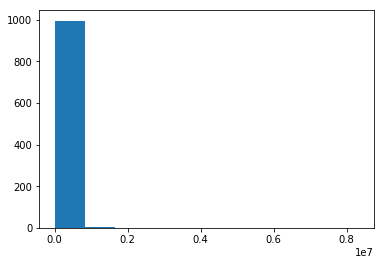

In [6]:
counts = []
for word in keys:
    count = all_words[word]
    counts.append(count)
    if(count>1e7):
        print(word)
        print(count)
plt.hist(counts)

In [7]:
top_words = {}
word_to_index = {}
index_to_word = {}
cutoff = 5e5
top_word_count = 0
extra_word_count = 0
i = 0
for word, count in all_words.items():
    if(count>cutoff):
        top_words[word] = count
        top_word_count += count
        word_to_index[word] = i
        index_to_word[i] = word
        i += 1
    else:
        extra_word_count += count
        
print(str(len(top_words)) + " words")
print("appearing " + str(top_word_count) + " times")
print("others appear " + str(extra_word_count) + " times")

11699 words
appearing 103341534423 times
others appear 7656749615 times


In [8]:
print(top_word_count/(extra_word_count + top_word_count))

0.9310192073565864


According to Mikolov, the best results from skipgram came from training with a loss function of negative sampling with k=15. This means using:
tf.nn.sampled_softmax_loss(
    weights = [num classes x dim],
    biases = [num_classes],
    labels = one-hot word vector for a single context word
    inputs = one quarter of the output,
    num_sampled = 15,
    num_classes = vocab size,
    num_true=1,
    sampled_values=None,
    remove_accidental_hits=True,
    partition_strategy='div',
    name='sampled_softmax_loss',
    seed=None
)
source: https://www.tensorflow.org/api_docs/python/tf/nn/sampled_softmax_loss

if mode == "train":
  loss = tf.nn.sampled_softmax_loss(
      weights=weights,
      biases=biases,
      labels=labels,
      inputs=inputs,
      ...,
      partition_strategy="div")
elif mode == "eval":
  logits = tf.matmul(inputs, tf.transpose(weights))
  logits = tf.nn.bias_add(logits, biases)
  labels_one_hot = tf.one_hot(labels, n_classes)
  loss = tf.nn.softmax_cross_entropy_with_logits_v2(
      labels=labels_one_hot,
      logits=logits)

From hw4:
embed_shape = [self.V, self.H]
self.W_in_ = tf.get_variable("W_in", embed_shape, initializer=tf.initializers.random_uniform(minval=-1.0,maxval=1.0))
x_in_ = tf.nn.embedding_lookup(self.W_in_, self.input_w_)

In [9]:
vocab_size = len(top_words) + 1
embed_dim = 300
neg_samples = 15
learning_rate_ = .001

In [18]:
maxyear = max(data.year)
minyear = min(data.year)

decades = range(minyear - minyear%10, maxyear, 10)

W_e_ = {}

print("Data from " + str(minyear) + " to " + str(maxyear))
for decade in decades:
    # initialize embeddings
    with tf.variable_scope(tf.get_variable_scope(), reuse=tf.AUTO_REUSE): 
        W_e_[decade] = tf.get_variable("W_e_" + str(i), 
                       [vocab_size, embed_dim], 
                       initializer = tf.initializers.random_uniform(minval=-1.0,
                                                                    maxval=1.0, 
                                                                    seed = 47))

Data from 1520 to 2008


follow the directions in https://www.tensorflow.org/tutorials/representation/word2vec to get skipgram model running

In [45]:
v_center_ = {}
v_context_0_= {}
v_context_1_ = {}
v_context_3_ = {}
v_context_4_ = {}
train_loss_ = {}
train_step_ = {}

batch_size = 32

center_word_ids_ = tf.placeholder(tf.int32, [batch_size])
context_word_id_0_ = tf.placeholder(tf.int32, [batch_size,1])
context_word_id_1_ = tf.placeholder(tf.int32, [batch_size,1])
context_word_id_3_ = tf.placeholder(tf.int32, [batch_size,1])
context_word_id_4_ = tf.placeholder(tf.int32, [batch_size,1])

for decade in decades:

    v_center_[decade] = tf.nn.embedding_lookup(W_e_[decade], center_word_ids_)
    v_context_0_[decade] = tf.nn.embedding_lookup(W_e_[decade], context_word_id_0_)
    v_context_1_[decade] = tf.nn.embedding_lookup(W_e_[decade], context_word_id_1_)
    v_context_3_[decade] = tf.nn.embedding_lookup(W_e_[decade], context_word_id_3_)
    v_context_4_[decade] = tf.nn.embedding_lookup(W_e_[decade], context_word_id_4_)
    
    train_loss_[decade] = tf.add(tf.add(tf.reduce_mean(tf.nn.sampled_softmax_loss(
        weights = W_e_[decade],
        biases = tf.zeros([embed_dim]),
        labels = context_word_id_0_,
        inputs = v_center_[decade],
        num_sampled = neg_samples,
        num_classes = vocab_size,
        num_true=1)),
                                        tf.reduce_mean(tf.nn.sampled_softmax_loss(
        weights = W_e_[decade],
        biases = tf.zeros([embed_dim]),
        labels = context_word_id_1_,
        inputs = v_center_[decade],
        num_sampled = neg_samples,
        num_classes = vocab_size,
        num_true=1))),
                                 tf.add(tf.reduce_mean(tf.nn.sampled_softmax_loss(
        weights = W_e_[decade],
        biases = tf.zeros([embed_dim]),
        labels = context_word_id_3_,
        inputs = v_center_[decade],
        num_sampled = neg_samples,
        num_classes = vocab_size,
        num_true=1)),
                                        tf.reduce_mean(tf.nn.sampled_softmax_loss(
        weights = W_e_[decade],
        biases = tf.zeros([embed_dim]),
        labels = context_word_id_4_,
        inputs = v_center_[decade],
        num_sampled = neg_samples,
        num_classes = vocab_size,
        num_true=1))))
                                        
    
    train_step_[decade] = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(train_loss_[decade])

init=tf.global_variables_initializer()

In [46]:
def ngram_to_decade_dict(filename, wordindices, decades):
    decade_dicts = {}
    for decade in decades:
        # initialize dictionary
        decade_dicts[decade] = {}
        
    data = pd.read_csv(filename, 
                       sep = '\t', 
                       header = None, 
                       names = ["words","year","total","pages","books"],
                       quotechar=None, 
                       quoting=3,
                       encoding = "ISO-8859-1")
    
    for i in range(len(data)):
        # get and split words, convert them to indices 
        wordlist = str(data.iloc[i,0]).lower().split(" ")
        indexlist = [vocab_size - 1,vocab_size -1,vocab_size -1,vocab_size -1,vocab_size -1]
        for i in range(len(wordlist)):
            currentword = wordlist[i]
            cleanword = clean_word(currentword)
            if(cleanword in wordindices):
                indexlist[i] = wordindices[cleanword]
        indextuple = tuple(indexlist)
        
        year = data.iloc[i,1]
        decade = year - year % 10
        
        count = data.iloc[i,2]
        
        if(indextuple in decade_dicts[decade]):
            decade_dicts[decade][indextuple] += count
        else:
            decade_dicts[decade][indextuple] = count
    return decade_dicts

In [47]:
#sample ngram data:

ngram_file = "googlebooks-eng-1M-5gram-20090715-0.csv"
ngram_data = pd.read_csv(ngram_file, 
                       sep = '\t', 
                       header = None, 
                       names = ["words","year","total","pages","books"],
                       quotechar=None, 
                       quoting=3,
                       encoding = "ISO-8859-1")
print(ngram_data.head())

              words  year  total  pages  books
0  "! "" "" He got"  1846      1      1      1
1  "! "" "" He got"  1855      1      1      1
2  "! "" "" He got"  1856      1      1      1
3  "! "" "" He got"  1857      1      1      1
4  "! "" "" He got"  1859      1      1      1


In [ ]:
# get ngram file

decade_dicts = ngram_to_decade_dict(ngram_file, word_to_index, decades)

run skipgram for each decade

In [ ]:
# initialize weights the same for every decade
# run training for each decade
# how to deal with counts? ideally, randomly disperse instances of an ngram throughout training
# current solutions: random.choices()
# issue: may not see every line. but this is proportional to frequency so idgaf

In [44]:
max_iter = 50000
decade = 1850
session = tf.Session()
session.run(init)

for iteration in range(max_iter):
    traindata = random.choices(list(decade_dicts[decade].keys()), 
                               weights = list(decade_dicts[decade].values()), 
                               k=batch_size)
    
    feed_dict = {
        context_word_id_0_ :  np.array([x[0] for x in traindata]).reshape((batch_size,1)),
        context_word_id_1_ :  np.array([x[1] for x in traindata]).reshape((batch_size,1)),
        center_word_ids_ : [x[2] for x in traindata],
        context_word_id_3_ :  np.array([x[3] for x in traindata]).reshape((batch_size,1)),
        context_word_id_4_ :  np.array([x[4] for x in traindata]).reshape((batch_size,1))
    }

    ops = [train_loss_[decade], train_step_[decade]]        

    cost, _ = session.run(ops, feed_dict)
    if(iteration % 1000 == 0):
        print(cost)
    

45.04714
19.22774
18.103184
15.629042
14.368801
11.397928
16.756271
8.793213
9.344069
10.537293
8.14793
9.627025
6.620831
5.636737
7.3352003
6.002255
14.384178
6.1317816
8.818291
5.270791
6.474782
3.3689694
5.4133344
8.179918
8.133219
4.3990517
6.0042486
4.1562433
5.395422
3.7149982
8.076654
5.6479015
9.085486


KeyboardInterrupt: 

In [ ]:
max_iter = 10000
filelist = ["googlebooks-eng-1M-5gram-20090715-1.csv",
           "googlebooks-eng-1M-5gram-20090715-2.csv",
           "googlebooks-eng-1M-5gram-20090715-3.csv",
           "googlebooks-eng-1M-5gram-20090715-4.csv",
            "googlebooks-eng-1M-5gram-20090715-5.csv",
            "googlebooks-eng-1M-5gram-20090715-6.csv"
           ]
for filename in filelist:
    decade_dicts = ngram_to_decade_dict(filename, wordindices, decades)
    for decade in decades:
        num_ngrams = len(decade_dicts[decade])
        if(num_ngrams >= batch_size):
            print("Training decade " + str(decade) + " with data from " + filename)
            max_decade_iter = min(max_iter, num_ngrams)
            for iteration in range(max_decade_iter):
                traindata = random.choices(list(decade_dicts[decade].keys()), 
                                           weights = list(decade_dicts[decade].values()), 
                                           k=batch_size)

                feed_dict = {
                    context_word_id_0_ :  np.array([x[0] for x in traindata]).reshape((batch_size,1)),
                    context_word_id_1_ :  np.array([x[1] for x in traindata]).reshape((batch_size,1)),
                    center_word_ids_ : [x[2] for x in traindata],
                    context_word_id_3_ :  np.array([x[3] for x in traindata]).reshape((batch_size,1)),
                    context_word_id_4_ :  np.array([x[4] for x in traindata]).reshape((batch_size,1))
                }

                ops = [train_loss_[decade], train_step_[decade]]        

                cost, _ = session.run(ops, feed_dict)
                if(iteration % 1000 == 0):
                    print(cost)
            
        
    

graph results